## PART 1: REST API

In the first part of the homework, the goal is to use the Nobel Prize API to extract the motivations of the Nobel Prize winners in Physics from 1901 to 2022. The extracted motivations will be used to generate a word cloud. The word cloud will give us an idea of the common themes in the motivations of the Nobel Prize winners in Physics.

This code achieves the following mostly through the use of the requests library to make HTTP requests to the Nobel Prize API and the WordCloud library to generate the word cloud. The code first makes a GET request to the Nobel Prize API to get the JSON data. The code then extracts the motivations of the Nobel Prize winners in Physics from the JSON data. The motivations are then joined together to form a single text. The WordCloud library is then used to generate the word cloud from the text.

In this part as well the next part of the homework, the "difficult" part of the code is seeing/knowing the structure of the JSON/HTML data, the actual code for extracting the data is relatively simple, either through python standard libraries or through the use of libraries like BeautifulSoup or WordCloud. The code to extract the motivations is simple, as it just requires looping through the JSON data and extracting the motivations. The code to generate the word cloud is also simple, as it just requires passing the text to the WordCloud library.

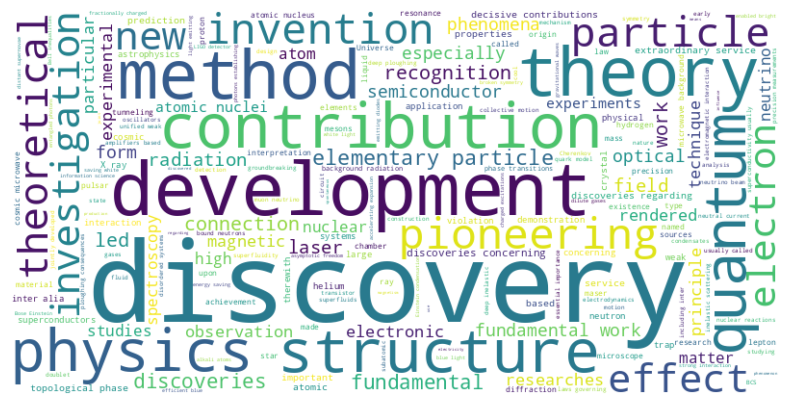

In [25]:
import requests  # Importing requests to make HTTP requests
from wordcloud import WordCloud  # Importing WordCloud for generating word cloud
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Making a get request to the URI
url = "http://api.nobelprize.org/2.1/nobelPrizes?sort=asc&nobelPrizeYear=1901&yearTo=2022&nobelPrizeCategory=phy&format=json&csvLang=en&limit=200"
response = requests.get(url)

# Getting the JSON data from the response
data = response.json()

# Extracting motivations
motivations = []
for prize in data['nobelPrizes']:
    if 'laureates' in prize:
        for laureate in prize['laureates']:
            motivations.append(laureate['motivation']['en'])

text = " ".join(motivations)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## PART 2: Web Scraping

In the second part of the homework, the goal is to scrape the book details from the website "https://books.toscrape.com/". We will extract the UPC, title, price, and rating of the books listed on the first 3 pages of the website. The extracted data will be stored in a DataFrame and displayed.

This code achieves the following mostly through the use of the BeautifulSoup library, which follows CSS selectors to extract the data from the HTML content of the website. The line of code to extract the upc is perhaps one of the more complex code when reading to understand what exactly is going on from just a quick glance. The way CSS selectors work is that they follow the structure of the HTML content and the relationship between the tags to extract the desired data. The code uses the 'table.table.table-striped tr' , and that basically means that it is looking for a table with the class 'table' and 'table-striped' and then looking for the 'tr' tag within that table. The 'tr' tag is the row of the table, and the 'th' tag is the heading of the row, and the 'td' tag is the data of the row. The code then checks if the heading of the row is 'UPC' and if it is, it extracts the data from the 'td' tag, which is the UPC of the book.

To extract the data, we follow these steps:
1. Loop through the first 3 pages of the website
2. For each page, extract the book title, price, and rating
3. For each book, go to the detail page to extract the UPC

This solution requires a nested for-loop to extract the important information from the website. The data is then stored in a DataFrame for easy
viewing. By knowing the structure of the website, through the use of CSS selectors, we can extract the necessary information from the website.


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display

base_url = "https://books.toscrape.com/" # Base URL of the website
start_url = "https://books.toscrape.com/catalogue/page-{}.html" # URL pattern for listing pages
all_books_data = [] # List to store extracted data

# We'll scrape the first 3 pages (page 1 to 3)

for page_num in range(1, 4): # Loop through webpages 1 to 3
    url = start_url.format(page_num) # Generate the URL for the page
    response = requests.get(url) # Make a GET request to the URL
    soup = BeautifulSoup(response.content.decode('utf-8'), 'html.parser') # Parse the HTML content

    # Each book is in a product_pod class
    books = soup.select('article.product_pod') 
    
    for book in books: # Loop through all the books in the page
        # Extract book title and relative URL
        title_element = book.select_one('h3 > a') # The title is in an anchor tag inside an h3 tag
        title = title_element['title'] # 
        relative_link = title_element['href']  # Something like "../<somebook>.html"
        
        # Make the relative link absolute
        # The URLs in the listing pages start with "../"
        # Actual detail page: base_url + "catalogue/" + <book_page>.html
        detail_url = base_url + "catalogue/" + relative_link.replace('../', '')

        # Extract price
        price = book.select_one('p.price_color').text.strip()

        # Extract rating
        rating_element = book.select_one('p.star-rating')
        rating = [c for c in rating_element['class'] if c != 'star-rating'][0] 

        # Now, go to detail page to get UPC
        detail_resp = requests.get(detail_url) # Make a GET request to the detail page
        detail_soup = BeautifulSoup(detail_resp.content.decode('utf-8'), 'html.parser') # Parse the HTML content

        # The UPC is located in the product information table
        product_info_table = detail_soup.select('table.table.table-striped tr') 
        upc = '' 
        for row in product_info_table: # Loop through all the rows in the table
            heading = row.select_one('th').text.strip()
            if heading == 'UPC':
                upc = row.select_one('td').text.strip()
                break
        
        # Append extracted data
        all_books_data.append((upc, title, price, rating))


# Create a DataFrame from the extracted data
df = pd.DataFrame(all_books_data, columns=['upc', 'title', 'price', 'rating'])
# Display the first 6 rows
display(df.head(6))

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
5,f77dbf2323deb740,The Requiem Red,£22.65,One
